In [2]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import keras

%matplotlib inline

Using TensorFlow backend.


In [3]:
data = np.load("fmri_preprocessed_2017_09_18.npy")
data = np.transpose(data)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data = np.transpose(data)
data = np.expand_dims(data, axis=2)

random = np.random.permutation(np.shape(data)[0])
ratio = .70
number = int(ratio * np.shape(random)[0])
print(number)
training = data[0:number,:,:]
test = data[number:,:,:]


print('Training data shape:', np.shape(training))
print('Testing data shape:', np.shape(test))


11539
Training data shape: (11539, 300, 1)
Testing data shape: (4946, 300, 1)


/home/chris/projects/rfmri/pig/envi/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
def m2():
    from keras.models import Sequential
    from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
    from keras import regularizers
    
    filters = [32, 64, 64, 128]
    kernel_size = [5, 5, 5, 3]
    pool_size = [2, 2, 3, 5]
    upsample_size = [2, 2, 3, 5]
    weight_decay = 0.00001
    
    model = Sequential()
        ### Encoding portion
    model.add(Conv1D(filters[0],
                         kernel_size[0],
                         input_shape=(300,1),
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[0], padding='same'))

    model.add(Conv1D(filters[1],
                         kernel_size[1],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[1], padding='same'))

    model.add(Conv1D(filters[2],
                         kernel_size[2],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[2], padding='same'))
    
    model.add(Conv1D(filters[3],
                         kernel_size[3],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(MaxPooling1D(pool_size[3], padding='same'))
    
#     model.add(Conv1D(filters[4],
#                          kernel_size[4],
#                          activation='relu',
#                          padding='same',
#                          kernel_regularizer=regularizers.l2(weight_decay)))
#     #model.add(BatchNormalization(axis=-1, momentum=0.99))
#     model.add(MaxPooling1D(pool_size[4], padding='same'))


    
#     ### Decoding portion
#     model.add(Conv1D(filters[4],
#                          kernel_size[4],
#                          activation='relu',
#                          padding='same',
#                          kernel_regularizer=regularizers.l2(weight_decay)))
#     #model.add(BatchNormalization(axis=-1, momentum=0.99))
#     model.add(UpSampling1D(upsample_size[4]))


    ### Decoding portion
    model.add(Conv1D(filters[3],
                         kernel_size[3],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[3]))
    
    model.add(Conv1D(filters[2],
                         kernel_size[2],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[2]))
    
    model.add(Conv1D(filters[1],
                         kernel_size[1],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[1]))


    model.add(Conv1D(filters[0],
                         kernel_size[0],
                         activation='relu',
                         padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay)))
    #model.add(BatchNormalization(axis=-1, momentum=0.99))
    model.add(UpSampling1D(upsample_size[0]))


        # Decoded output
    model.add(Conv1D(1, 1, activation='linear', padding='same'))

    #sgd = optimizers.SGD(lr=0.001, clipvalue=0.5, momentum=.9, decay=0.0001)
    model.compile(optimizer='Adadelta', loss='mse')
   
    
    return model

auto_model = m2()
auto_model.fit(training, training, batch_size=128, epochs=50, verbose=1, shuffle=True, validation_data=(test,test))


Train on 11539 samples, validate on 4946 samples
Epoch 1/50
11539/11539 [==============================] - 10s - loss: 0.8727 - val_loss: 0.7894
Epoch 2/50
11539/11539 [==============================] - 9s - loss: 0.8164 - val_loss: 0.7752
Epoch 3/50
11539/11539 [==============================] - 9s - loss: 0.8058 - val_loss: 0.7564
Epoch 4/50
11539/11539 [==============================] - 9s - loss: 0.7980 - val_loss: 0.7534
Epoch 5/50
11539/11539 [==============================] - 9s - loss: 0.7923 - val_loss: 0.7626
Epoch 6/50
11539/11539 [==============================] - 9s - loss: 0.7859 - val_loss: 0.7416
Epoch 7/50
11539/11539 [==============================] - 9s - loss: 0.7811 - val_loss: 0.7532
Epoch 8/50
11539/11539 [==============================] - 9s - loss: 0.7761 - val_loss: 0.7468
Epoch 9/50
11539/11539 [==============================] - 9s - loss: 0.7696 - val_loss: 0.7304
Epoch 10/50
11539/11539 [==============================] - 9s - loss: 0.7632 - val_loss: 0.7270

In [6]:
auto_model.save('../../Results/12D/model.h5')

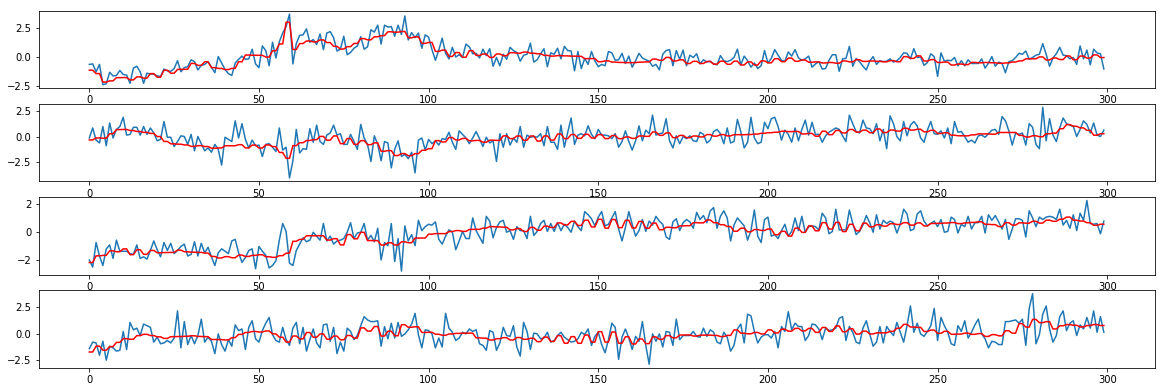

In [7]:
sample_1 = training[np.newaxis, 601]
output_1 = auto_model.predict(sample_1)

sample_2 = training[np.newaxis, 70]
output_2 = auto_model.predict(sample_2)

sample_3 = training[np.newaxis, 896]
output_3 = auto_model.predict(sample_3)

sample_4 = training[np.newaxis, 10387]
output_4 = auto_model.predict(sample_4)


plt.figure(figsize=(20, 10))
plt.subplot(611)
plt.plot(np.squeeze(sample_1))
plt.plot(np.squeeze(output_1), c='r')
plt.subplot(612)
plt.plot(np.squeeze(sample_2))
plt.plot(np.squeeze(output_2), c='r')
plt.subplot(613)
plt.plot(np.squeeze(sample_3))
plt.plot(np.squeeze(output_3), c='r')
plt.subplot(614)
plt.plot(np.squeeze(sample_4))
plt.plot(np.squeeze(output_4), c='r')

plt.savefig('../../Results/12D/reconstructions.png')

In [9]:
auto_model.layers[7].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dilation_rate': (1,),
 'filters': 128,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': {'class_name': 'L1L2',
  'config': {'l1': 0.0, 'l2': 9.999999747378752e-06}},
 'kernel_size': (3,),
 'name': 'conv1d_9',
 'padding': 'same',
 'strides': (1,),
 'trainable': True,
 'use_bias': True}

In [10]:
embedding_model = keras.models.Model(inputs=auto_model.input,
                                 outputs=auto_model.layers[7].output)
embeddings = embedding_model.predict(data)
squished_embeddings = np.reshape(embeddings, (embeddings.shape[0], -1))

In [11]:
print(embeddings.shape)
print(squished_embeddings.shape)
np.save('../../Results/12D/embeddings-squished.npy', squished_embeddings)

(16485, 5, 128)
(16485, 640)


[  390   916  1258 13578 13941 14099 14574]


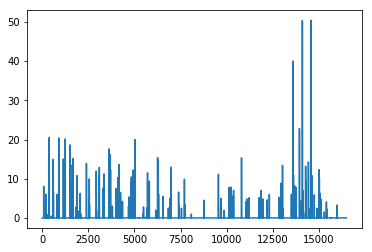

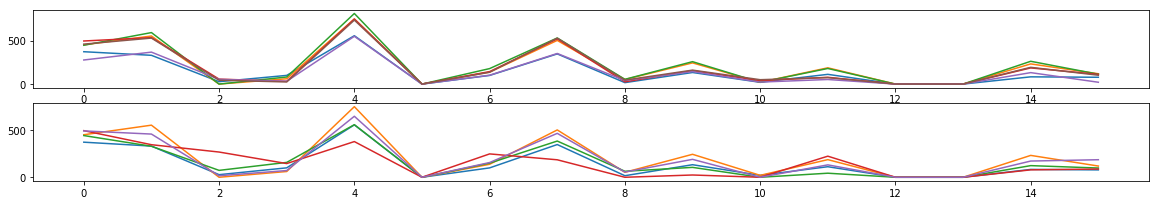

In [12]:
# squished_embeddings = np.load('../../Results/12B/embeddings-squished.npy')
# plt.plot(squished_embeddings[:, 10])

# filter_10_response = squished_embeddings[:, 10]
# where = np.where(filter_10_response > 20) 
# print(where[0])

# plt.figure(figsize=(20, 10))
# plt.subplot(611)
# plt.plot(squished_embeddings[390])
# plt.plot(squished_embeddings[916])
# plt.plot(squished_embeddings[1258])
# plt.plot(squished_embeddings[13578])
# plt.plot(squished_embeddings[13941])
# plt.plot(squished_embeddings[14099])
# plt.subplot(612)
# plt.plot(squished_embeddings[390])
# plt.plot(squished_embeddings[916])
# plt.plot(squished_embeddings[988])
# plt.plot(squished_embeddings[12988])
# plt.plot(squished_embeddings[10388])